In [2]:
import pandas as pd
import numpy as np

# Default DF
DF = pd.DataFrame({'A': [1, 2, 3], 
                   'B': [4, 5, 6], 
                   'C': [7, 8, 9]})



# Create the original DataFrame
DF = pd.DataFrame({'A': [np.nan, 2, 3], 
                   'B': [np.nan, np.nan, 6], 
                   'C': [7, np.nan, np.nan]})

# Create DF_1 with rows containing less than two NaNs
DF_1 = DF[DF.isnull().sum(axis=1) < 2]

# Create DF_2 with rows containing 2 or more NaNs
DF_2 = DF[DF.isnull().sum(axis=1) >= 2]

print(DF_1)
print(DF_2)

# Retrieve the column names
column_names = DF.columns
# Print the column names
print(f"The column names are: {column_names}")


     A    B   C
2  3.0  6.0 NaN
     A   B    C
0  NaN NaN  7.0
1  2.0 NaN  NaN
The column names are: Index(['A', 'B', 'C'], dtype='object')


In [4]:
DF = pd.DataFrame({'A': ['x', 'y', 'z'], 'B': [2, 3, 1]})

# Sort the DataFrame by column 'B'
sorted_DF = DF.sort_values(by='B')

print(sorted_DF)

   A  B
2  z  1
0  x  2
1  y  3


In [3]:

data = {'A': [1, 2, 3, 4],
        'B': [5, 6, 7, 8],
        'C': [9, 10, 11, 12],
        'D': [13, 14, 15, 16]}
df = pd.DataFrame(data)

# Copy values from column D to column A
df['A'] = df['D']

# Print the updated DataFrame
print(df)

    A  B   C   D
0  13  5   9  13
1  14  6  10  14
2  15  7  11  15
3  16  8  12  16


In [14]:
# Create the NumPy array
N = np.array([[10, 20, 30],
              [40, 50, 60],
              [70, 80, 90]])

# Create the DataFrame
DF = pd.DataFrame({'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})

# Assign column names from the DataFrame to the NumPy array
DF_N = pd.DataFrame(N)
print(f"This if DF without columns:\n {DF_N} \n")
DF_N.columns = DF.columns
print(f"This if DF with columns:\n {DF_N} \n")
DF_N


This if DF without columns:
     0   1   2
0  10  20  30
1  40  50  60
2  70  80  90 

This if DF with columns:
     A   B   C
0  10  20  30
1  40  50  60
2  70  80  90 



,A,B,C
0,10,20,30
1,40,50,60
2,70,80,90


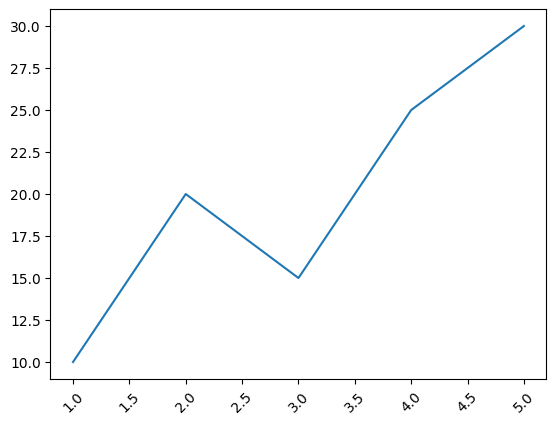

In [17]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 30]

# Plotting the data
plt.plot(x, y)

# Rotating the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [20]:
# Generate a NumPy array with 5 random values
random_array = np.random.rand(5)

# Find the largest value in the random_array
largest_value = np.max(random_array)

print("Random Array:", random_array)
print("Largest Value:", largest_value)

Random Array: [0.04928259 0.70303149 0.44964207 0.58325532 0.6700795 ]
Largest Value: 0.7030314887838032


In [9]:
data = {'A': ['5C', 'nan', '9B'] }
df = pd.DataFrame(data)

# Print the updated DataFrame
print(df)

     A
0   5C
1  nan
2   9B


In [5]:
data = { i: ['A', 'B'],
         f: ['C', 'D'] }
df = pd.DataFrame(data)

print(data[i])

NameError: name 'i' is not defined

In [7]:
# Create a DataFrame
data = {'Name': ['John', 'Alice', 'Bob', 'John', 'Alice'],
        'Age' : [25, 30, 35, 25, 30],
        'City': ['New York', 'Paris', 'London', 'New York', 'Paris']}
df = pd.DataFrame(data)
df

,Name,Age,City
0,John,25,New York
1,Alice,30,Paris
2,Bob,35,London
3,John,25,New York
4,Alice,30,Paris


In [4]:
# Create a DataFrame
data = {'Name': ['John', 'Alice', 'Bob', 'John', 'Alice'],
        'Age': [25, 30, 35, 25, 30],
        'City': ['New York', 'Paris', 'London', 'New York', 'Paris']}
df = pd.DataFrame(data)

# Group the DataFrame by the 'Name' column
grouped = df.groupby('Name')

# Get the groups and their corresponding indices
groups = grouped.groups
print(groups)
print(groups['Bob'])



{'Alice': [1, 4], 'Bob': [2], 'John': [0, 3]}
Index([2], dtype='int64')


In [ ]:
#####################################################################
##  OLD VERSION OF Remove the outlier columns                      ##
#####################################################################

# Create a copy of the current dataset and feature summary  
#  Note: '_roc' stands for Removed Outliers Columns.   
azdias_nan_roc = azdias_nan.copy()
feat_info_roc = feat_info.copy() 

# Retrieve the names of the features to remove
drop_candidates = (azdias_miss[azdias_miss['missing_values'] >= miss_threshold])

# Drop columns
for f in drop_candidates.index:
    feature = drop_candidates['feature'][f]
    if VERBOSE > 0:
        print(f"[INFO] Dropping feature \'{feature}\' from the dataset and feature-info.")
    azdias_nan_roc = azdias_nan_roc.drop([feature], axis=1)
   
    # Remove the corresponding row in the feature summary
    feat_info_roc = feat_info_roc.drop(feat_info_roc[feat_info_roc['attribute'] == 
                                                     feature ].index)    
    
if VERBOSE > 0:
    print(f"\n[INFO] The shape of the dataset is now {azdias_nan_roc.shape}")
    print(f"[INFO] The shape of the feat_info is now {feat_info_roc.shape}") 

In [ ]:
###############################################################################
## OLD VERSION  Divide the data into two subsets                             ##
#####################################################################

# Define a threshold for the split. This threshold specifies the acceptable
# number of missing values per row as a percentage of the number of columns.
threshold = 32
miss_threshold = (int)(azdias_nan_roc.shape[1] * threshold / 100)

# Subset with less than 'miss_threshold' NaNs
azdias_nan_roc_lo_miss = azdias_nan_roc[azdias_nan_roc.isnull().sum(axis=1) <= miss_threshold]

# Subset with more than 'miss_threshold' NaNs
azdias_nan_roc_hi_miss = azdias_nan_roc[azdias_nan_roc.isnull().sum(axis=1) > miss_threshold]

if VERBOSE > 1:
    print(f"The shape of the 'low'  subset is {azdias_nan_roc_lo_miss.shape}")
    print(f"The shape of the 'high' subset is {azdias_nan_roc_hi_miss.shape}")



In [ ]:
##################################################################
##  OLD VERSION OF Identify the categorical variables           ##
##################################################################

# List the categorical variables
categorical_features = feat_info_roc[feat_info_roc['type'] == 'categorical'].copy()

# Add a column with the number of unique values per feature and populate it
categorical_features['unique_values'] = 0

for index, row in categorical_features.iterrows():
    attrib_name = row['attribute']
    if attrib_name in azdias_nan_roc_lo_miss:
        num_unique = azdias_nan_roc_lo_miss[attrib_name].nunique()
        if VERBOSE > 2:
            print(f"Attribute {attrib_name} has {num_unique} unique values")
        categorical_features.loc[index, 'unique_values'] = num_unique

# Sort the dataframe by the 'unique_values' column 
categorical_features = categorical_features.sort_values(by='unique_values', ascending=False)

print(f"This is a summary of the categorical variables and the number of unique values:")
categorical_features

In [ ]:
#############################################################################
##  OLD VERSION OF Re-Encoding Categorical Features                        ##
#############################################################################
df_g2 =   (categorical_features.loc[categorical_features['unique_values'] == 2])

df_g3_to_6 = categorical_features.loc[
            (categorical_features['unique_values'] >= 3) &
            (categorical_features['unique_values'] <= 6)]
           
# Re-encode members of the group2 (if needed)                   
for index, row in df_g2.iterrows():
    attrib_name = row['attribute']
    column_type = azdias_nan_roc_lo_miss[attrib_name].dtype
    # Assess that the feature is a sub dtype of np.number
    if not np.issubdtype(column_type, np.number):
        print("[HOUSTON, We have a problem!!]")
        print(f"\tPleased handle the type of the feature \'{attrib_name}\' properly as it is currently not a sub-type of np.number." )
        sys.exit()

# Re-encode members of the group3_to_6 
#  (here we use pandas.get_dummies() but OneHotEncoder() from Scikit-learn is also an option)
for index, row in df_g3_to_6.iterrows():
    attrib_name = row['attribute']
    column_type = azdias_nan_roc_lo_miss[attrib_name].dtype
    # Assess that the feature is a sub dtype of np.number
    if not np.issubdtype(column_type, np.number):
        print("[HOUSTON, We have a problem!!]")
        print(f"\tPleased handle the type of the feature \'{attrib_name}\' properly as it is currently not a sub-type of np.number." )
        sys.exit()
    ohe = pd.get_dummies(azdias_nan_roc_lo_miss[attrib_name], prefix=attrib_name)
    if VERBOSE > 2:
        print(f"The One-Hot-Encoded version of feature \'{attrib_name}\' is:")
        print(ohe.head())
        print(f"--------------------------------------------------------")

In [ ]:
#############################################################################
##  OLD VERSION OF Identify the mixed variables                            ##
#############################################################################

# List the mixed variables
mixed_features = feat_info_roc[feat_info_roc['type'] == 'mixed'].copy()

# Add a column with the number of unique values per feature and populate it
mixed_features['unique_values'] = 0

for index, row in mixed_features.iterrows():
    attrib_name = row['attribute']
    if attrib_name in azdias_nan_roc_lo_miss:
        num_unique = azdias_nan_roc_lo_miss[attrib_name].nunique()
        if VERBOSE > 2:
            print(f"Attribute {attrib_name} has {num_unique} unique values")
        mixed_features.loc[index, 'unique_values'] = num_unique

# Sort the dataframe by the 'unique_values' column 
mixed_features = mixed_features.sort_values(by='unique_values', ascending=False)

print(f"This is a summary of the mixed variables and the number of unique values:")
mixed_features


In [ ]:
####################################################################
##  OLD VERSION OF Investigate 'CAMEO_INTL_2015' and engineer two new variables  ##
####################################################################

# [INFO] The 'CAMEO_INTL_2015' feature combines information on two axes: 
#  wealth and life stage. This code breaks up the two-digit codes by their
#  'tens'-place and 'ones'-place digits into two new ordinal variables named
#  'CAMEO_INTL_2015_WEALTH' and 'CAMEO_INTL_2015_LIFE_STAGE'. Futhermore, for
#  the purposes of this project, it is OK to just treat them as their raw
#  numeric values.

# Create a copy of the current dataset and feature summary
azdias_nan_roc_lo_miss_mixed = azdias_nan_roc_lo_miss.copy()
feat_info_roc_mixed = feat_info_roc.copy()
 
# Substitute the remaining "XX' strings of feature 'CAMEO_INTL_2015' by NaN
azdias_nan_roc_lo_miss_mixed.loc[azdias_nan_roc_lo_miss_mixed['CAMEO_INTL_2015'] == 'XX', 'CAMEO_INTL_2015'] = np.nan
# And convert the column to float values
azdias_nan_roc_lo_miss_mixed['CAMEO_INTL_2015'] = azdias_nan_roc_lo_miss_mixed['CAMEO_INTL_2015'].astype(float)

# Add and populate two new columns in the dataset
#OBSOLETE azdias_nan_roc_lo_miss_mixed['CAMEO_INTL_2015_LIVE_STAGE'] = np.nan
azdias_nan_roc_lo_miss_mixed['CAMEO_INTL_2015_LIFE_STAGE'] = (azdias_nan_roc_lo_miss_mixed['CAMEO_INTL_2015'].mod(10))

#OBSOLETE azdias_nan_roc_lo_miss_mixed['CAMEO_INTL_2015_WEALTH'] = np.nan
azdias_nan_roc_lo_miss_mixed['CAMEO_INTL_2015_WEALTH'] = (azdias_nan_roc_lo_miss_mixed['CAMEO_INTL_2015'] -
                                                          azdias_nan_roc_lo_miss_mixed['CAMEO_INTL_2015_LIFE_STAGE'])

# Drop the obsoleted 'CAMEO_INTL_2015' feature from the dataset
azdias_nan_roc_lo_miss_mixed = azdias_nan_roc_lo_miss_mixed.drop('CAMEO_INTL_2015', axis=1)

# Accordingly, drop 'CAMEO_INTL_2015' and add two new rows to feature-info 
feat_info_roc_mixed = feat_info_roc.drop(feat_info_roc_mixed[feat_info_roc_mixed['attribute'] == 
                                                     'CAMEO_INTL_2015' ].index)
new_row_1 = {'attribute'         : 'CAMEO_INTL_2015_LIVE_STAGE',
             'information_level' : 'microcell_rr4',
             'type'              : 'mixed',
             'missing_or_unknown': '[NaN]'}
new_row_2 = {'attribute'         : 'CAMEO_INTL_2015_WEALTH',
             'information_level' : 'microcell_rr4',
             'type'              : 'mixed',
             'missing_or_unknown': '[NaN]'}
feat_info_roc_mixed.loc[len(feat_info_roc_mixed)] = new_row_1
feat_info_roc_mixed.loc[len(feat_info_roc_mixed)] = new_row_2

In [ ]:
######################################################
##  OLD VERSION OF Finalize the last two features of type 'object' ##
######################################################

sel_objects = list(azdias_nan_roc_lo_miss_cat_mix.select_dtypes(include='object'))

print(f"[INFO] At this stage of the data wrangling, we are left with {azdias_nan_roc_lo_miss_cat_mix.shape[1]} features.")
print(f"       We still need to do some processing on 2 of them as they are of data type 'object'.")
print(f"       These two features of data type 'object' are:")
print(f"         {sel_objects}")

# Substitute the remaining "X' strings of feature 'CAMEO_DEUG_2015' by NaN
azdias_nan_roc_lo_miss_cat_mix.loc[azdias_nan_roc_lo_miss_cat_mix['CAMEO_DEUG_2015'] == 'X', 'CAMEO_DEUG_2015'] = np.nan
if VERBOSE > 2:
    print(f"This is to verify that they are no 'X' sting left in the feature encoding.")
    x_test = azdias_nan_roc_lo_miss_mixed[azdias_nan_roc_lo_miss_cat_mix['CAMEO_DEUG_2015'] == 'X']
    print(f"\t {x_test.shape}")

# And convert the column 'CAMEO_DEUG_2015' to float values
azdias_nan_roc_lo_miss_cat_mix['CAMEO_DEUG_2015'] = azdias_nan_roc_lo_miss_cat_mix['CAMEO_DEUG_2015'].astype(float)    

# Substitute the remaining "XX' strings of feature 'CAMEO_DEU_2015' by NaN
azdias_nan_roc_lo_miss_cat_mix.loc[azdias_nan_roc_lo_miss_cat_mix['CAMEO_DEU_2015'] == 'XX', 'CAMEO_DEU_2015'] = np.nan
if VERBOSE > 2:
    print(f"This is to verify that they are no 'XX' sting left in the feature encoding.")
    xx_test = azdias_nan_roc_lo_miss_cat_mix[azdias_nan_roc_lo_miss_cat_mix['CAMEO_DEU_2015'] == 'XX']
    print(f"\t {xx_test.shape}")

# And convert the column 'CAMEO_DEU_2015' from Hex string to Float values
azdias_nan_roc_lo_miss_cat_mix['CAMEO_DEU_2015']  = azdias_nan_roc_lo_miss_cat_mix['CAMEO_DEU_2015'].apply(lambda x: int(x, 16) if isinstance(x, str) else x)
                                                                 

In [ ]:
#############################################################
##  OLD VERSION OF Display a Summary of the Current State of the Dataset  ##
#############################################################

print(f"[INFO] At this stage of the data wrangling, the dataset is ready for the analysis.")
print(f"       The dataset is based on the subset with few or no missing values and it consists of: ")
print(f"           {azdias_nan_roc_lo_miss_mixed.shape[0]} rows x {azdias_nan_roc_lo_miss_mixed.shape[1]} columns")

# Select the column names which are of data type 'float'
the_floats = list(azdias_nan_roc_lo_miss_mixed.select_dtypes(include='float'))
the_ints   = list(azdias_nan_roc_lo_miss_mixed.select_dtypes(include='integer'))
print(f"           They are {len(the_floats)} features of type \'float64\' ")
print(f"           They are {len(the_ints)} features of type \'int64\' ")

# List the feature types using 'groupby'
col_types = azdias_nan_roc_lo_miss_mixed.columns.to_series().groupby(azdias_nan_roc_lo_miss_mixed.dtypes).groups
print(f"       The list of \'int64\' and \'float64\' type of features is:")
print(f"           {col_types}")

    Column1   Column2   Column3   Column4
0  0.392576  0.574581  0.315205  0.219052
1  0.213140  0.191725  0.904416  0.732138
2  0.762318  0.593024  0.403223  0.918397
3  0.747560  0.864854  0.963748  0.684387
4  0.154061  0.974686  0.486039  0.125368
5  0.270498  0.783489  0.767684  0.941355
6  0.079698  0.211891  0.774843  0.440037
7  0.955934  0.187775  0.764306  0.784983
8  0.791888  0.615231  0.553751  0.852408
9  0.569419  0.703028  0.160965  0.432905


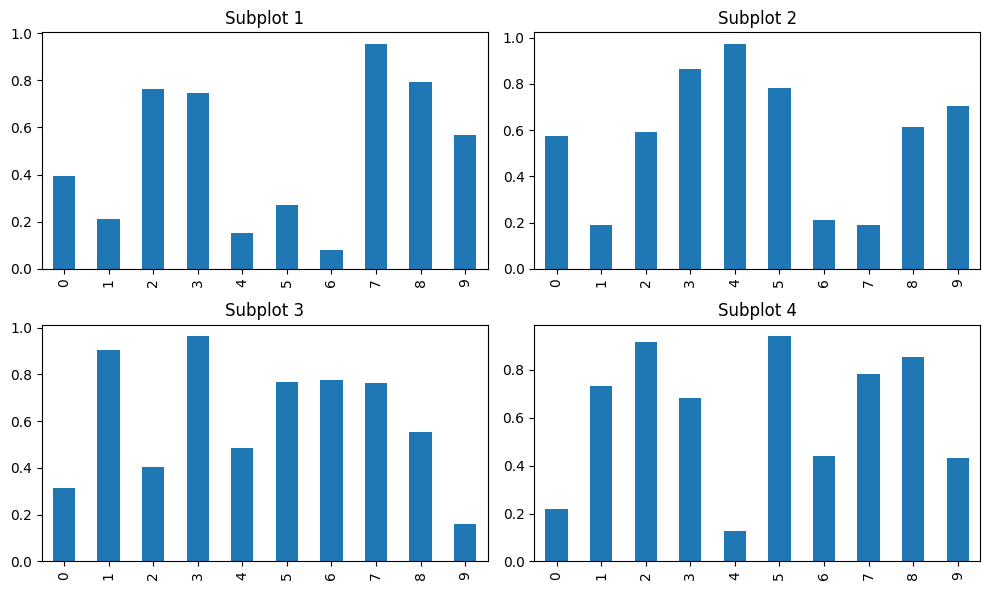

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a dictionary with column names as keys and random data as values
data = {
    'Column1': np.random.rand(10),
    'Column2': np.random.rand(10),
    'Column3': np.random.rand(10),
    'Column4': np.random.rand(10)
}

# Creating the dataframe
df = pd.DataFrame(data)
print(df)

# Assuming you have a dataframe called 'df'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plotting the first subplot as a bar plot
df['Column1'].plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Subplot 1')

# Plotting the second subplot as a bar plot
df['Column2'].plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Subplot 2')

# Plotting the third subplot as a bar plot
df['Column3'].plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Subplot 3')

# Plotting the fourth subplot as a bar plot
df['Column4'].plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Subplot 4')

# Adjusting the layout
plt.tight_layout()

# Displaying the subplots
plt.show()

In [ ]:
def plot_pca_results(full_dataset, pca, dim, verbose=0):
    '''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''        
    # Retreive the matrix with the loadings of each feature on each principal
    #  component. Fyi, each row corresponds to a principal component, and each
    #  column corresponds to a feature.
    feature_weights = pca.components_
    if verbose > 2 :
        print(f"The shape of the PCA weight matrix is {pca.components_.shape} ")
   
    # Extract the weights of dimension 'd'
    weights_dim_1 = feature_weights[0]
    
    # Take the absolute values of the weights
    abs_weights = abs(weights_dim_1)

    # Create a dataframe with the feature weights of dimension 1
    feature_names = data_ss.columns
    df_weights_dim_1 = pd.DataFrame(data=abs_weights, 
                                    columns=['Feature Weight'],
                                    index=feature_names)

    # Sort the dataframe by weights
    df_weights_dim_1 = df_weights_dim_1.sort_values(by='Feature Weight',
                                                    ascending=False)

    # Select a set of top contributors
    top_selection = (int)(pca.components_.shape[1]/4)
    top_features = df_weights_dim_1[:top_selection]
    
    if verbose > 1:
        print(top_features)

    # Bar plot the weights 
    top_features.plot.bar()

    # Set the title and labels for the plot
    plt.title('Feature Weights of Dimension 1')
    plt.xlabel('Features')
    plt.ylabel('Weight')

    # Rotate the x-axis labels by 45 degrees and dercreas font size
    plt.xticks(rotation=45, fontsize=7)

    # Display the plot
    plt.show()
    